In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

SEED = 69
NUM_SAMPLES = 100
np.random.seed(SEED)

In [14]:
def generate_data(num_samples):
    """Generate dummy data for linear regression."""
    X = np.array(range(num_samples))
    random_noise = np.random.uniform(-40, 40, size=num_samples)
    y = 4*X + random_noise # add some noise
    return X, y

X, y = generate_data(num_samples=NUM_SAMPLES)
data = np.vstack([X, y]).T
print (data[:5])


[[  0.         -16.30006707]
 [  1.          28.72541725]
 [  2.          -3.97979798]
 [  3.          35.15274051]
 [  4.          20.90791806]]


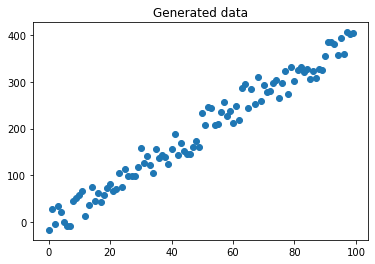

In [15]:
# Load into a Pandas DataFrame
df = pd.DataFrame(data, columns=["X", "y"])
X = df[["X"]].values
y = df[["y"]].values

# Scatter plot
plt.title("Generated data")
plt.scatter(x=df["X"], y=df["y"])
plt.show()

In [16]:
# Split (train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)


In [17]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [18]:
from sklearn.metrics import mean_squared_error
pred_train = mean_squared_error(y_train, model.predict(X_train))
pred_test = mean_squared_error(y_test, model.predict(X_test))

print(pred_train, pred_test)

438.4125995312518 426.0645624015341


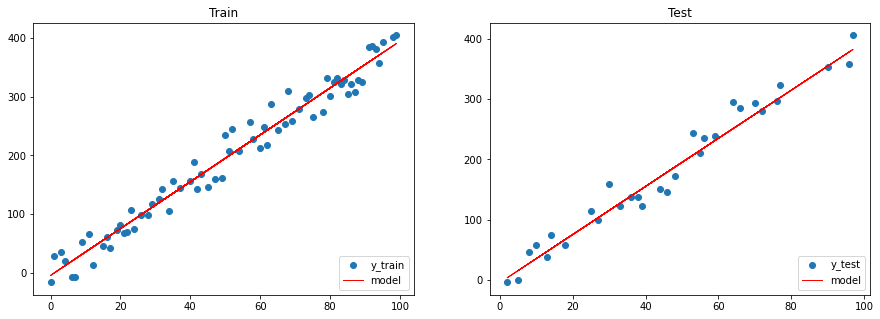

In [19]:
# Figure size
plt.figure(figsize=(15,5))

# Plot train data
plt.subplot(1, 2, 1)
plt.title("Train")
plt.scatter(X_train, y_train, label="y_train")
plt.plot(X_train, model.predict(X_train), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Plot test data
plt.subplot(1, 2, 2)
plt.title("Test")
plt.scatter(X_test, y_test, label='y_test')
plt.plot(X_test, model.predict(X_test), color="red", linewidth=1, linestyle="-", label="model")
plt.legend(loc="lower right")

# Show plots
plt.show()
